In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('Wholesale customers data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [32]:
num_col = ["Fresh",	"Milk"	,"Grocery", "Frozen", "Detergents_Paper",	"Delicassen"]
cate_col = ["Channel", "Region"]

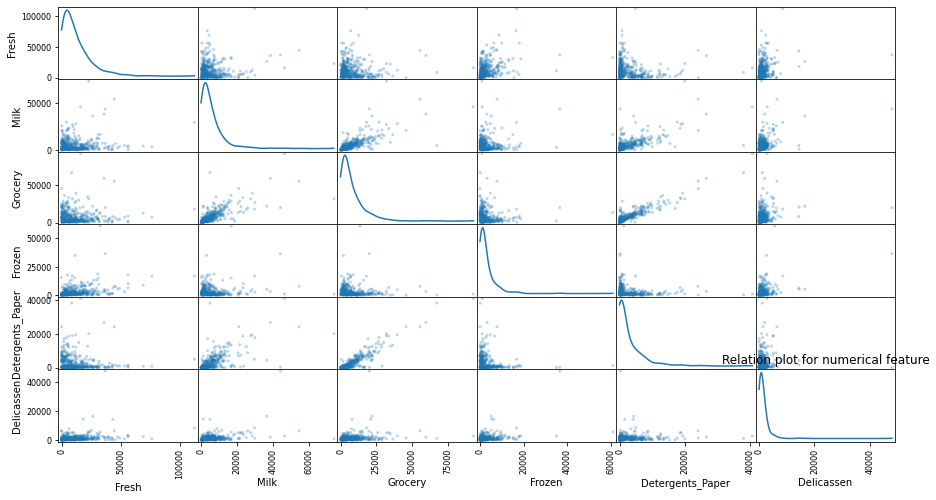

In [33]:
pd.plotting.scatter_matrix(df[num_col], alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.title('Relation plot for numerical feature')
plt.show()

- The pairs Milk-Grocery , Grocery-Detergents_Paper and Detergents_Paper-Milk show negative correlation. And the rest of the pairs show some degree of positive correlation.
- And as for the feature selected above (Grocery) shows some degree of positive correlation with all the other features(except Milk and Detergents_Paper). This confirms the suspicions to some extent about the relevance of the feature which I tried to predict, since Grocery shows a correlation with other features except Milk and Detergents_Paper.

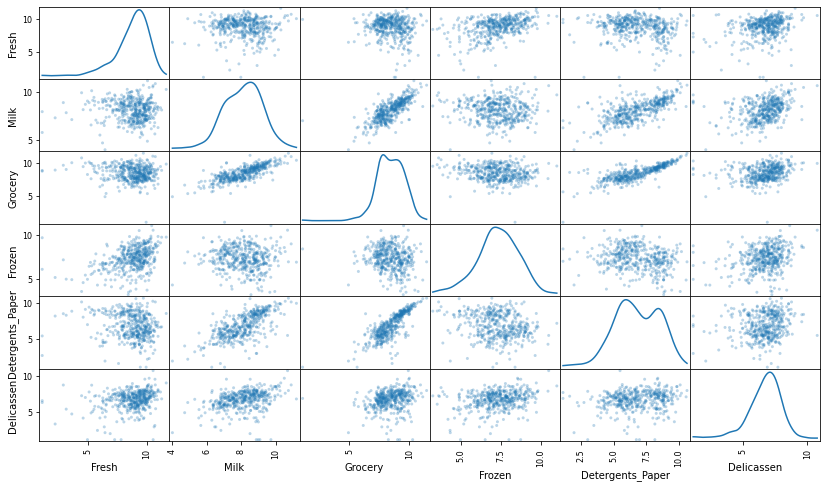

In [34]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(df[num_col])

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [35]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers = outliers + log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    
# OPTIONAL: Select the indices for data points you wish to remove
from collections import Counter
cntr = Counter(outliers)
for i in cntr.keys():
    if cntr[i] == 1:
        outliers.remove(i)
outliers = set(outliers)
outliers = list(outliers)
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print(str(len(outliers)) + "\nOutliers have the following indices : ")
print(outliers)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


5
Outliers have the following indices : 
[128, 65, 66, 75, 154]


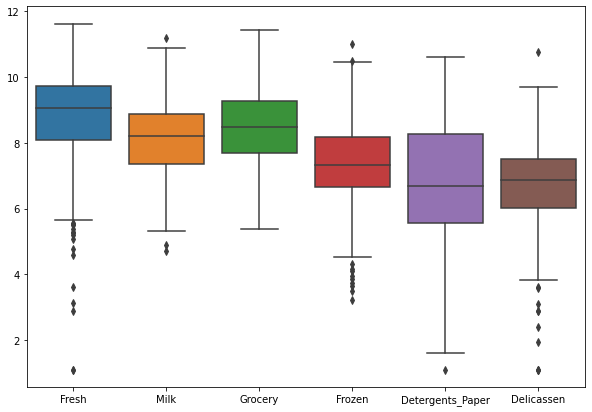

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(data=good_data)
plt.show()

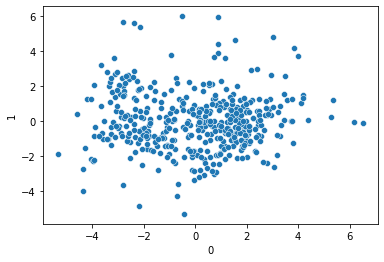

In [37]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_df = pd.DataFrame(pca.fit_transform(good_data), columns=[0, 1])
sns.scatterplot(reduced_df[0], reduced_df[1], legend="full")
plt.show()

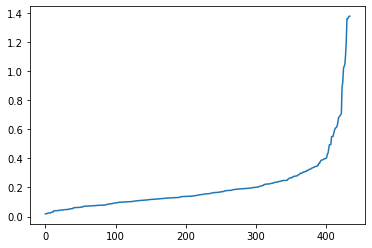

In [38]:
# Find Hyper Parameter
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced_df)
distances, indices = nbrs.kneighbors(reduced_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

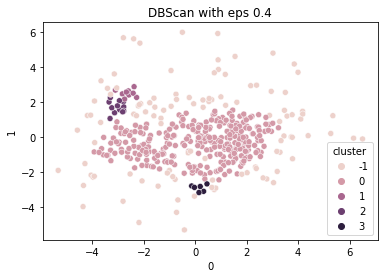

Silhouette Coefficient: -0.0330


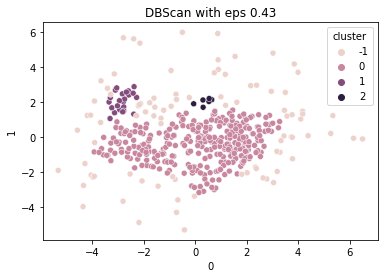

Silhouette Coefficient: -0.0036


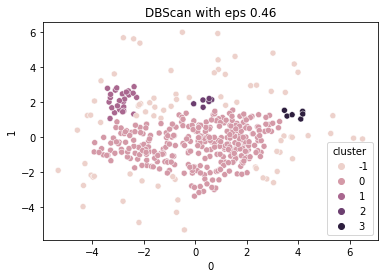

Silhouette Coefficient: -0.0219


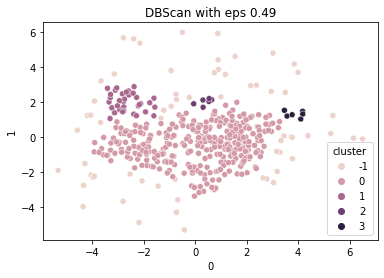

Silhouette Coefficient: -0.0021


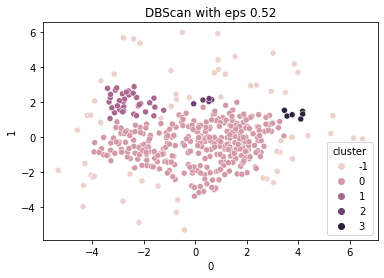

Silhouette Coefficient: 0.0024


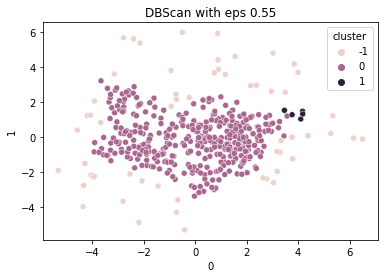

Silhouette Coefficient: 0.1699


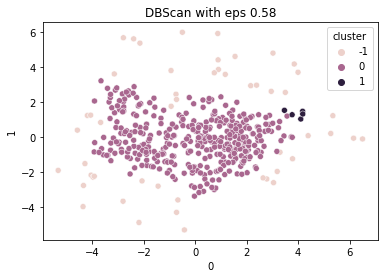

Silhouette Coefficient: 0.1732


In [41]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import *

eps = [0.4, 0.43, 0.46, 0.49, 0.52, 0.55, 0.58]
for i in eps:
    db = DBSCAN(eps=i, min_samples=6)
    cluster = db.fit(reduced_df)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d2 = pd.DataFrame()
    d2 = pd.concat([reduced_df,cluster_id],axis=1)
    d2.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d2[0], d2[1], hue = d2['cluster'], legend="full")
    plt.title('DBScan with eps {}'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d2.iloc[:,:-1], d2['cluster'])))